# Fast Campus EDA

## Fast Campus 데이터 개요
- 2021.03.29~2021.09.26 Fast Campus 온라인 강의 결제 내역 (약 10만개)
- 데이터 분석 과제로 제공된 데이터로, 제 3자의 공유 및 사용을 금함
- 결제 정보를 바탕으로 소비 패턴, 광고 효과 등을 분석하고 발전을 위한 방향성 제시

## 목표
- 데이터를 확인하고, 결측치 등을 제거하고 전처리한다.
- 타겟 변수를 지정하고, 그에 영향을 준 데이터를 확인한다.
- 영향을 준 데이터가 있다면, 그 데이터가 시사하는 insight를 분석한다.

## Columns Infomation

|Name|Description|
|------|---|
|id|해당 거래 내역 ID|
|customer_id|구매자 ID|
|course_id|강의 ID (패키지의 경우는 없음)|
|type|거래 별 결제 상태|
|state|진행 상태|
|couse_title|강의명|
|category_title|대분류|
|format|온라인 강의 기획 종류|
|completed_at|결제 완료 시간|
|transaction_amount|최종 결제 금액|
|coupon_title|쿠폰명|
|coupon_discount_amount|쿠폰 할인 금액|
|sale_price|할인 적용 가격|
|tax_free_amount|부가세 미적용 가격 (=transaction amount)|
|pg|결제 대행사명|
|method|결제 방식|
|subcategory_title|소분류|
|marketing_start_at|판매 시작 날짜|

# 데이터 불러오기 & 전처리

## 데이터 불러오기

In [2]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 데이터 로딩 및 확인
train = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/yds/FC_EDA/파이널프로젝트_RAW_210329_210926.xlsx')

In [5]:
df = train
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [6]:
# 데이터 종류 확인 / customer_id, course_id 등에 결측치 있어서 flaot
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [7]:
# 결측치 확인
df.isna().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [8]:
# payment completed 살리기

In [9]:
# category_title이 null일 경우 course_title & format도 null인걸 확인
df[df['category_title'].isnull()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
9002,996843,490139.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,480000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
9003,996793,490089.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
9004,996842,490138.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
9005,996851,490149.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
12133,1011200,NaN,NaN,TRANSACTION,COMPLETED,NaN,NaN,NaN,2021-04-12 11:40:00,0,NaN,NaN,NaN,NaN,NaN,B2B_CONTRACT,NaN,NaT
12181,1006736,291328.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-12 13:10:10,967000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
13754,1012747,498414.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-15 20:40:35,170000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
31192,1063323,524510.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-05-10 18:04:33,35000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
36367,1066932,NaN,NaN,TRANSACTION,COMPLETED,NaN,NaN,NaN,2021-05-17 16:12:00,0,NaN,NaN,NaN,NaN,NaN,B2B_CONTRACT,NaN,NaT
38944,1093777,539708.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-05-22 10:57:39,127500,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT


In [11]:
# category_title이 null일 경우 제거
df = df.dropna(subset = ['category_title'])

In [10]:
df.isna().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

## 데이터 탐색

In [12]:
# 결제 타입, PAYMENT, REFUND만 활용
df['type'].value_counts()

PAYMENT    61415
ORDER      40157
REFUND      3823
Name: type, dtype: int64

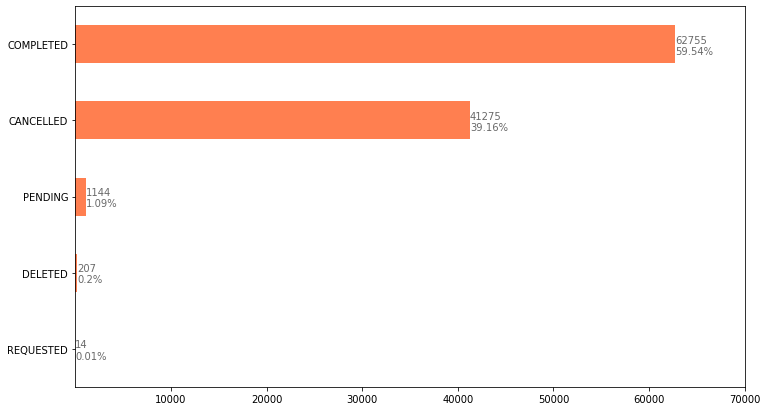

In [13]:
# 결제 완료 건 확인


ax = df['state'].value_counts().plot(kind='barh', figsize=(12,7),
                                        color="coral", fontsize=10);
ax.set_alpha(0.8)
ax.set_xticks([i for i in range(10000,80000,10000)])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            f"{i.get_width()}\n{round((i.get_width()/total)*100, 2)}"+'%', fontsize=10,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

In [14]:
# course 종류
df['course_title'].value_counts()

초격차 패키지 : 한 번에 끝내는 프론트엔드 개발               3257
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터    2756
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집               2541
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법    2132
올인원 패키지 : star741의 캐주얼 일러스트 드로잉           1636
                                          ... 
(B2B) (주)유투바이오 온라인 구독 패키지 플랜 - 비대면바우처        1
(B2B) 카테크 온라인 구독 올 플랜 - 비대면바우처               1
(B2B) 주식회사 마링 온라인 구독 올 플랜 - 비대면바우처           1
(B2B) 한국정보보호컨설팅 온라인 구독 패키지 플랜 - 비대면바우처       1
(B2B) (주)오디 온라인 구독 올 플랜 - 비대면바우처             1
Name: course_title, Length: 1638, dtype: int64

In [15]:
# 카테고리
df['category_title'].value_counts()

프로그래밍       34430
데이터사이언스     14076
업무 생산성      13323
디자인         12009
영상/3D       10260
마케팅          9857
부동산/금융       5523
투자/재테크       2501
크리에이티브       2250
교육           1031
지식콘텐츠          56
비즈니스           42
파이낸스           25
데이터 사이언스        9
관리              2
일러스트            1
Name: category_title, dtype: int64

In [16]:
# 코스 종류
df['format'].value_counts()

올인원        87395
RED         6253
온라인 완주반     3817
하루10분컷      2978
B2B 온라인     1086
스쿨 온라인      1057
스쿨          1036
B2B          808
B2G          592
이벤트          193
아카이브          72
MBA           56
캠프            48
관리             2
콜로소            2
Name: format, dtype: int64

In [17]:
# pg 데이터 확인 (결측치 15075건)
df['pg'].value_counts()

INICIS    60081
KAKAO     17249
NAVER      8044
PAYCO      4642
CHAI        321
Name: pg, dtype: int64

In [18]:
# 결제 방식
df['method'].value_counts()

CARD         66374
VBANK         8540
POINT         8084
PROMOTION     4733
TRANS         2732
TRANSFER      1234
ONSITE         598
VOUCHER          5
Name: method, dtype: int64

In [19]:
# 쿠폰 종류
df['coupon_title'].value_counts()

[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                                 5498
[WELCOME] 온라인 강의 3만원 할인쿠폰                                3206
[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰                                 2469
[WELCOME] 온라인 강의 2만원 할인쿠폰                                2325
[WELCOME] 온라인 강의 1만원 할인쿠폰                                1900
                                                         ... 
[무료수강권] 한 번에 끝내는 Java/Spring 웹 개발 마스터 초격차 패키지_안성훈 강사님       1
오늘 단 하루! 하루 10분컷 5%할인 (~6/2)                                1
[무료수강권] RED 검수용_공정필 PM님                                     1
[서포터즈 전용] 재무/세무 회계 실무 완성 무료 수강                              1
[재결제쿠폰]초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                   1
Name: coupon_title, Length: 494, dtype: int64

In [20]:
# 쿠폰 할인 값
df['coupon_discount_amount'].value_counts()

20000.0     9428
10000.0     5713
30000.0     4587
50000.0      642
79000.0      402
            ... 
124200.0       1
6845.0         1
4325.0         1
49200.0        1
52050.0        1
Name: coupon_discount_amount, Length: 773, dtype: int64

In [21]:
df['subcategory_title'].value_counts()

영상 편집        7312
백엔드 개발       6144
개발자 커리어      5918
프론트엔드 개발     5879
딥러닝/인공지능     4590
데이터분석        4302
PPT/보고서      4150
디자인툴         4053
모바일앱         3724
엑셀/VBA       3591
글쓰기/카피라이팅    3524
일러스트         3238
UX/UI        2775
데이터마케팅       2306
DevOps       2136
금융/투자 실무     2075
모션그래픽        2033
머신러닝         1958
회계/재무/세무     1948
시각디자인        1927
주식 투자        1787
디지털마케팅       1754
게임           1707
SNS마케팅       1190
부동산 개발       1179
업무자동화         996
코딩 입문         782
부동산 투자        714
VFX           523
리더십           511
게임 그래픽        385
데이터엔지니어링      275
커뮤니케이션        204
Name: subcategory_title, dtype: int64

## 타겟 변수 'Payment - Completed'

- '고객의 강의 순 구매율'을 타겟 변수로 지정, 다른 값들과 비교하여 구매율과 연관된 지표를 분석하고 insight 제시
- payment - completed 중에 refund된 값도 있으므로 해당 변수는 제외하고 산정

In [22]:
# 데이터 확인, payment-completed 값 52899,refund-completed 값 3821
pd.pivot_table(data=df, index = ['type','state'], values=['transaction_amount'],  aggfunc = ["count"])

count
                  transaction_amount
type    state                       
ORDER   CANCELLED              34122
        COMPLETED               6035
PAYMENT CANCELLED               7153
        COMPLETED              52899
        DELETED                  205
        PENDING                 1144
        REQUESTED                 14
REFUND  COMPLETED               3821
        DELETED                    2

In [23]:
# payment-completed인 값 purchased column에 추가 (bool)

df['purchased'] = (df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
# 각각 [payment], [refund]가 <completed> 인 값의 customer_id, course_id tuple 형태로 리스트 만듦
p = df[(df['type'] == 'PAYMENT')&(df['state']=='COMPLETED')]
r = df[(df['type'] == 'REFUND')&(df['state']=='COMPLETED')]
paid = list(zip(p['customer_id'].astype(float), p['course_id'].astype(float)))
ref = list(zip(r['customer_id'].astype(float), r['course_id'].astype(float)))

In [25]:
# 각 케이스의 갯수 확인 (위에 수치와 일치)
print(len(paid),len(ref)) 1False 1True 2 /  1 1 4 5 6 7 (1)

SyntaxError: ignored

In [26]:
# 중요!
# [customer_id],[course_id]가 일치하는 값 = 환불 후 재구매하지 않은 케이스
# 이 외의 다른 케이스는 쿠폰 등을 사용하여 재결제 했을 가능성 있음 -> 순수 환불이 아님
# 'payment-completed'와 'refund-completed'의 [customer_id],[course_id] 비교
# 결과 값을 real_ref에 담아둔다 

real_ref = []
for i in range(len(paid)):
  for j in range(len(ref)):
    if paid[i][0] == ref[j][0] and paid[i][1] == ref[j][1]:
      real_ref.append(ref[j])
      ref.remove(ref[j])
      break

In [27]:
# 총 결제 수 / 순수 환불 건수 / 재구매 등 기타 이유
print(len(paid),len(real_ref),len(ref))

52899 1927 1894


In [28]:
52899-1927

50972

In [29]:
# 계산 전 purchase 값 확인
# 여기서 환불 케이스 (1927개) 만큼 True가 False로 바뀌어야 함
df['purchased'].value_counts()

True     52899
False    52496
Name: purchased, dtype: int64

In [30]:
# purchased = True 값 중 환불이 이뤄진 경우 -> 최종적으로 구매한 값 X
# 데이터 내 purchased = True인 값 중 real_ref와 값이 겹칠 경우 False로 바꿈

for i in range(len(df)):
  a = float(df.iloc[i,1]) # = customer_id
  b = float(df.iloc[i,2]) # = course_id
  if df.iloc[i,18] == True: # = purchased = True인 값
    for j in range(len(real_ref)): # 값 비교
      if real_ref[j][0] == a and real_ref[j][1] == b: # 환불 리스트에 해당 customer_id, course_id 있을 경우
          df.iloc[i,18] = False # True에서 False로 변경
          real_ref.remove(real_ref[j]) # 중복 방지를 위해 해당 값 삭제
          break

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [31]:
# 성공적으로 줄어든 모습 확인
df['purchased'].value_counts()

False    54423
True     50972
Name: purchased, dtype: int64

In [36]:
pt = df[df['purchased'] == True]

In [43]:
pt['id'] = pt['id'].astype(int)
pt['customer_id'] = pt['customer_id'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
(df[df['purchased'] == True]['customer_id'].value_counts()).value_counts()

1     31076
2      5038
3      1306
4       466
5       236
6       137
7        62
8        37
9        22
10       14
11       14
12        7
13        5
14        5
15        4
16        2
39        2
47        1
17        1
18        1
19        1
21        1
22        1
26        1
27        1
29        1
33        1
34        1
37        1
42        1
53        1
Name: customer_id, dtype: int64

In [55]:
df[df['customer_id']==98685.0]['transaction_amount'].sum()

9537750

In [74]:
df[df['customer_id'] == 512983]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,purchased
22694,1039468,512983.0,204638.0,PAYMENT,COMPLETED,(B2B) 서울형 청년인턴 디지털 마케팅 및 영업 과정 (국내),마케팅,B2B,2021-04-29 15:51:40,113400000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT,True


In [59]:
pt.groupby("customer_id").agg({"id": "count",}).sort_values(by="id", ascending=False)[:len(pt)//50]

,id
customer_id,
98685,53
427973,47
158374,42
50769,39
3189,39
...,...
490520,4
580645,4
391716,4


In [70]:
pt.groupby("customer_id").agg({"transaction_amount": "sum","id":'count'}).sort_values(by=["id","transaction_amount"], ascending=False).head(100)

,transaction_amount,id
customer_id,,
98685,7040750,53
427973,0,47
158374,0,42
50769,4979110,39
3189,0,39
...,...,...
15235,1146150,8
20648,1145500,8
6822,1103700,8


In [75]:
t = pt.groupby("customer_id").agg({"transaction_amount": "sum","id":'count'}).sort_values(by=["id","transaction_amount"], ascending=False)

t.groupby("id").agg({"transaction_amount":"sum"})

,transaction_amount
id,
1,5672119569
2,1397271970
3,571671094
4,230144153
5,157235602
6,104728490
7,48403739
8,31924080
9,20384360


In [72]:
pt.groupby("customer_id").agg({"transaction_amount": "sum","id":'count'}).sort_values(by=["transaction_amount","id"], ascending=False).head(100)

,transaction_amount,id
customer_id,,
512983,113400000,1
548381,81040000,1
594969,72300000,2
589392,58100000,1
567160,50665980,1
...,...,...
548257,2607000,3
15407,2527700,5
11576,2463300,12


### 결과
- 데이터 불러오기, 전처리 완료. 이후 필요에 따라 추가적인 전처리 및 가공
- 데이터 탐색 결과, 각 데이터 별 활용 방법, 어떤 insight로 접근할 지 확인 완료
- '순 구매율'이라는 타겟 변수 확보, 이를 이용해 다양한 지표, 가설 등을 세워 비교

-----------------여기까지 쓰시면 됩니다----------------

# 데이터 확인, 비교


## 타겟 변수 'Survived'

In [ ]:
df[(df['type']=='PAYMENT')&(df['state']=='COMPLETED')].value_counts()

id       customer_id  course_id  type     state      course_title                    category_title  format  completed_at         transaction_amount  coupon_title               coupon_discount_amount  sale_price  tax_free_amount  pg      method  subcategory_title  marketing_start_at   purchased
996347   489344.0     201998.0   PAYMENT  COMPLETED  올인원 패키지 : iOS 앱 개발              프로그래밍           올인원     2021-04-07 14:15:18  92000               [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰   20000.0                 112000.0    112000.0         INICIS  CARD    모바일앱               2020-01-14 00:00:00  True         1
1284716  631879.0     205747.0   PAYMENT  COMPLETED  초격차 패키지 : 한 번에 끝내는 React의 모든 것  프로그래밍           올인원     2021-08-13 18:26:02  167000              [WELCOME] 온라인 강의 3만원 할인쿠폰  30000.0                 197000.0    197000.0         INICIS  CARD    프론트엔드 개발           2021-07-09 00:00:00  True         1
1284522  631837.0     202876.0   PAYMENT  COMPLETED  REC.ON : VC                     부동산/금융          올

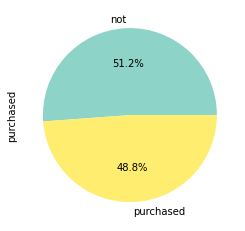

In [ ]:
# 기본적으로 사망자가 더 많다
df['purchased'].value_counts().plot.pie(autopct='%.1f%%', cmap='Set3', labels=['not','purchased'])

### 타겟 변수와의 상관관계 분석

#### 분석

In [ ]:
# 1에 가까울수록 양의 상관관계, -1에 가까울 수록 음의 상관관계, 0에 가까울수록 관계성 적음
df.corr()

,pclass,survived,sex,age,sibsp,parch,fare,body,boat_boarder,age_sort
pclass,1.000000,-0.312469,-0.124617,-0.372115,0.060832,0.018322,-0.558803,-0.049382,-0.323428,-0.381875
survived,-0.312469,1.000000,0.528693,-0.047021,-0.027825,0.082660,0.244556,-0.250897,0.948190,-0.030843
sex,-0.124617,0.528693,1.000000,-0.055101,0.109609,0.213125,0.185820,-0.193214,0.482086,-0.050481
age,-0.372115,-0.047021,-0.055101,1.000000,-0.190345,-0.128821,0.173931,0.158741,-0.044883,0.970597
sibsp,0.060832,-0.027825,0.109609,-0.190345,1.000000,0.373587,0.160434,-0.046510,-0.026488,-0.182201
parch,0.018322,0.082660,0.213125,-0.128821,0.373587,1.000000,0.221706,-0.038374,0.089321,-0.114144
fare,-0.558803,0.244556,0.185820,0.173931,0.160434,0.221706,1.000000,-0.009263,0.252998,0.177837
body,-0.049382,-0.250897,-0.193214,0.158741,-0.046510,-0.038374,-0.009263,1.000000,-0.245246,0.177264
boat_boarder,-0.323428,0.948190,0.482086,-0.044883,-0.026488,0.089321,0.252998,-0.245246,1.000000,-0.027308
age_sort,-0.381875,-0.030843,-0.050481,0.970597,-0.182201,-0.114144,0.177837,0.177264,-0.027308,1.000000


#### 결과
- 'sex','fare','boat_boarder' 등이 타겟변수와 양의 상관관계, 'pclass'가 음의 상관 관계를 보인다.
- 'sex'의 경우 1이 여성이므로 여성이 생존률이 더 높다는 것을 알 수 있다.
- 'pclass'의 경우 숫자가 낮을수록 등급이 높으므로, 높은 등급에 앉은 쪽이 더 많이 생존한 것으로 보인다.
- 이 외에도 'fare'와 'pclass', 'age'와 'pclass', 'sibsp'와 'parch' 등이 높은 상관관계를 보인다.

## 각 요소별 생존률

### 전반적인 생존률 분포

#### 분석

In [ ]:
df.groupby(['survived']).mean()

,pclass,sex,age,sibsp,parch,fare,body,boat_boarder,age_sort
survived,,,,,,,,,
0,2.500618,0.156984,30.161928,0.521632,0.328801,23.324963,0.149567,0.011125,2.470952
1,1.962000,0.678000,28.914000,0.462000,0.476000,49.361184,0.000000,0.954000,2.386000


#### 결과
- 배에 타지 않고 살아남은 사람이 있다. (구조)
- 배에 탄 사람들 중에도 사망자가 있다.
- 다른 요소들은 세분화해서 볼 필요가 있다.

### 계층별 생존률

#### 분석

In [ ]:
df['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [ ]:
how = {
    'survived' : np.mean
}
p = df.groupby(['pclass']).agg(how)*100
p

,survived
pclass,
1,61.919505
2,42.960289
3,25.528914


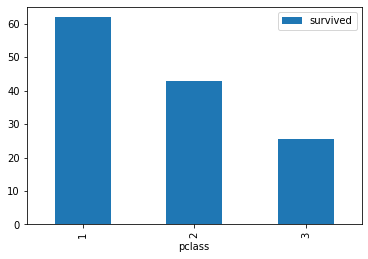

In [ ]:
# 표
p.plot.bar()

#### 결과
- 높은 등급의 티켓을 가진 사람이 더 많이 생존하였다.
- 만약 승객들의 자리가 등급에 따라 다르게 배치되었다면, 충돌은 3등급 주변에서 일어났을 가능성이 높다.

### 성별에 따른 생존률

#### 분석

In [ ]:
# 0이 남성 1이 여성
mw = df.groupby(['sex']).agg(how)*100
mw

,survived
sex,
0,19.098458
1,72.746781


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


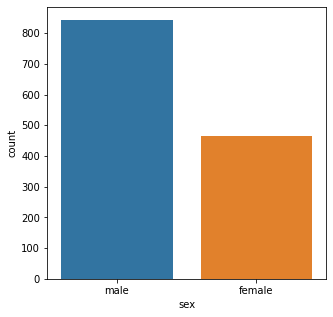

In [ ]:
# 표 (남자는 0 여자는 1)
plt.figure(figsize=(5,5))
sns.countplot('sex', data=df).set_xticklabels(['male','female'])
plt.show()

#### 결과
- 여성이 남성보다 압도적으로 많이 구출되었다.

### 나이에 따른 생존률

#### 분석

In [ ]:
# row마다 아동, 10대, 20대...80대 순으로 정렬
df.groupby(df['age_sort']).agg(how)*100

,survived
age_sort,
0,60.975610
1,39.160839
2,32.948929
3,42.241379
4,38.518519
5,45.714286
6,31.250000
7,14.285714
8,100.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


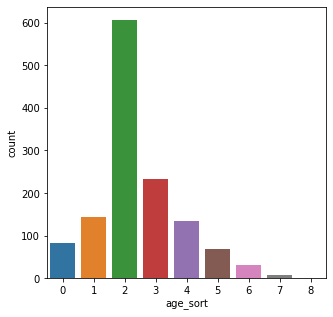

In [ ]:
# 표
plt.figure(figsize=(5,5))
sns.countplot('age_sort', data=df)
plt.show()

#### 결과
- 타이타닉 내에는 20대, 30대가 가장 많이 있었다.
- 단, 결측치를 나이의 평균값으로 선정했기 때문에 신빙성이 떨어진다.

### 종합 분석 결과
- 가장 지표가 좋은 수치들을 추려 분석한 결과, 유의미한 데이터를 산출했다.
- 다만 단일 지표로서 생존률과 가장 밀접한 연관을 지니는 것은 성별 정도인 것 같다. 구출 과정 시 노약자와 더불어 여성을 많이 구출한 듯 하다.

## 복합적 추론

### 계층 & 성별에 따른 생존률

#### 분석

In [ ]:
how = {
    'survived' : np.mean
}
ps = df.groupby(['pclass','sex']).agg(how)*100
ps

survived
pclass sex           
1      0    34.078212
       1    96.527778
2      0    14.619883
       1    88.679245
3      0    15.212982
       1    49.074074

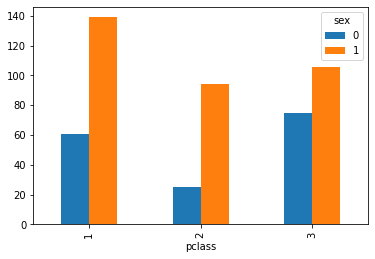

In [ ]:
# 표
df.groupby(['pclass','sex'])['survived'].sum().unstack().plot.bar()

#### 결과
- 계층 내에서도 남성이 여성보다 적게 생존하였다.
- 3등급 인원이 가장 많음에도 불구하고, 생존률이 2등급보다 훨씬 높다. 
- 2등급이 주로 위치한 곳에서 사고가 났기 때문에 2등급이 유독 생존률이 낮다고 판단된다.

### 생존 편향

#### 보트 탑승자 편향

##### 분석

In [ ]:
# 보트 탑승자 수 (0은 미탑승, 1은 탑승)
df['boat_boarder'].value_counts()

0    823
1    486
Name: boat_boarder, dtype: int64

In [ ]:
# 보트별 탑승자 수
df['boat'].value_counts()

0          823
13          39
C           38
15          37
14          33
4           31
10          29
5           27
3           26
9           25
11          25
16          23
8           23
7           23
D           20
6           20
12          19
2           13
A           11
B            9
1            5
5 7          2
C D          2
13 15        2
5 9          1
8 10         1
13 15 B      1
15 16        1
Name: boat, dtype: int64

In [ ]:
# 보트에 탄 사람은 살아남았는가?
df.groupby(df['boat']).mean()

,pclass,survived,sex,age,sibsp,parch,fare,body,boat_boarder,age_sort
boat,,,,,,,,,,
0,2.503038,0.027947,0.178615,30.130012,0.520049,0.325638,23.213365,0.147023,0.0,2.466586
1,1.000000,1.000000,0.400000,42.000000,0.600000,0.000000,46.980020,0.000000,1.0,3.600000
10,1.931034,1.000000,0.827586,26.137931,0.862069,0.965517,62.154886,0.000000,1.0,2.206897
11,1.960000,1.000000,0.720000,22.320000,0.480000,0.520000,37.648832,0.000000,1.0,1.800000
12,2.105263,0.947368,0.894737,26.684211,0.473684,0.421053,19.688811,0.000000,1.0,2.263158
13,2.641026,1.000000,0.641026,24.589744,0.256410,0.307692,16.143479,0.000000,1.0,2.000000
13 15,3.000000,1.000000,0.000000,23.500000,0.000000,0.000000,7.510400,0.000000,1.0,2.000000
13 15 B,3.000000,1.000000,0.000000,29.000000,0.000000,0.000000,7.750000,0.000000,1.0,2.000000
14,2.000000,0.969697,0.757576,25.212121,0.424242,0.909091,32.687879,0.000000,1.0,2.030303


In [ ]:
df.groupby(df['boat_boarder']).mean()

,pclass,survived,sex,age,sibsp,parch,fare,body,age_sort
boat_boarder,,,,,,,,,
0,2.503038,0.027947,0.178615,30.130012,0.520049,0.325638,23.213365,0.147023,2.466586
1,1.942387,0.981481,0.656379,28.932099,0.462963,0.485597,50.300180,0.000000,2.390947


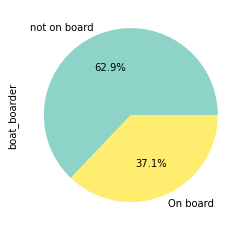

In [ ]:
# 표 1 <보트에 탄 사람의 비율>
df['boat_boarder'].value_counts().plot.pie(autopct='%.1f%%', cmap='Set3', labels=['not on board','On board'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


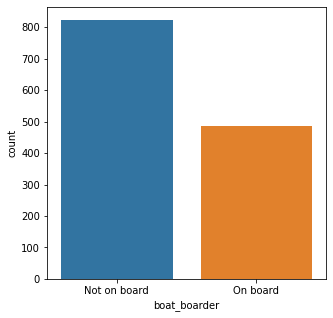

In [ ]:
# 표 2 <보트에 탄 인원 수>
plt.figure(figsize=(5,5))
sns.countplot('boat_boarder', data=df).set_xticklabels(['Not on board','On board'])
plt.show()

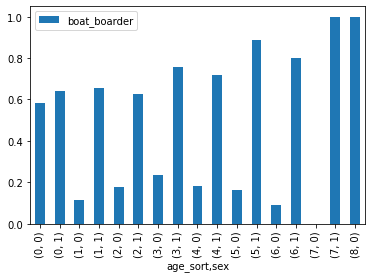

In [ ]:
# 표 3 <승선자 나이 및 성별>
how = {
    'boat_boarder' : np.mean
}
j = df.groupby(['age_sort','sex']).agg(how)
j.plot.bar()

##### 결과
- 일부 구명보트의 경우 1등급만 타고 있거나, 상위 등급만 타고 있는 경우가 존재한다.
- 노약자나 어린이의 경우에는 남녀를 가리지 않고 태웠다.
- 구명보트에 탔지만 죽은 사람도 존재한다.
- 극히 일부의 경우 보트에 타지 않고도 살아남았다.
- 생존한 80대 노인 남성, 70대 노인 여성은 모두 안전히 배에 탔다.

# 최종 결과
- 다양한 요소들과 관계성을 확인하기 위해 생존률을 타겟 변수를 지정하고, 그에 영향을 준 데이터를 확인하였다.
- 생존률과 상관계수가 높은 수치들을 주로 탐색하였고, 성별이 생존률에 가장 큰 영향을 미치는 것을 확인하였다.
- 다각적인 면에서 분석하기 위해 다양한 요소들을 복합적으로 비교해본 결과, 구명보트에 탄 나이대와 성별, 계층과 성별에 따른 생존률 등, 단일 수치로는 판단하기 어려운 복합적인 관계를 추가로 확인할 수 있었다.